**2.1 Images**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Tasks 1, 2, 3**

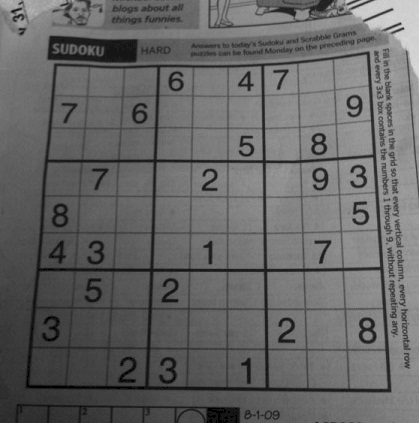

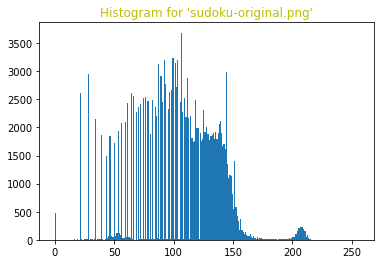

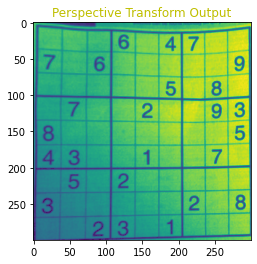

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

#Task 1
#load input image
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/ME 592X/Assignment1/sudoku-original.png', 0)
cv2_imshow(img)

#Task 2
#plot histogram of input image
plt.hist(img.ravel(), 256, [0, 256])
plt.title('Histogram for \'sudoku-original.png\'', color = 'y')
plt.show()

#Task 3
#rectangle points for input image
# min1_x, min1_y = 0, 0
# max1_x, max1_y = 300,300

#rectangle points for output image
min2_x, min2_y = 0, 0
max2_x, max2_y = 300,300

# rectangle points for input image; top-left, top-right, bottom-left, and bottom-right
pt_set1 = np.float32([[50,60], [370, 45], [25, 385], [390, 400]])

# rectangle points for output image; top-left, top-right, bottom-left, and bottom-right
pt_set2 = np.float32([[min2_x, min2_y], [max2_x,min2_y], [min2_x, max2_y], [max2_x, max2_y]])

#get transformation matrix
trnsf_matrix = cv2.getPerspectiveTransform(pt_set1, pt_set2)

#apply transformation matrix on input image
apply_trnsf_matrix = cv2.warpPerspective(img, trnsf_matrix, (max2_x, max2_y))
plt.title('Perspective Transform Output', color = 'y')
plt.imshow(apply_trnsf_matrix)



**2.2 Time Series**

In [3]:
import pandas as pd
import numpy as np

#read csv file
csv_file = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ME 592X/Assignment1/energydata_complete.csv', usecols=[0, 27])


In [4]:
csv_file

,date,Energy_Consumption
0,1/11/2016 17:00,13.275433
1,1/11/2016 17:10,18.606195
2,1/11/2016 17:20,28.642668
3,1/11/2016 17:30,45.410390
4,1/11/2016 17:40,10.084097
...,...,...
19730,5/27/2016 17:20,43.096812
19731,5/27/2016 17:30,49.282940
19732,5/27/2016 17:40,29.199117
19733,5/27/2016 17:50,6.322784


**Task 1**

Text(0.5, 1.0, 'One week energy consumption')

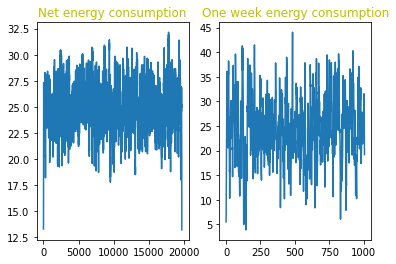

In [5]:
import scipy.signal

appl_energyCon = csv_file[['Energy_Consumption']]
appl_energyCon_np = appl_energyCon.to_numpy()

def apply_convolution(sig, window):
    conv = np.repeat([0., 1., 0.], window)
    filtered = scipy.signal.convolve(sig, conv, mode='same') / window
    return filtered

filtered1 = apply_convolution(appl_energyCon_np[:,0], 50)
plt.subplot(1,2,1)
plt.plot(filtered1)
plt.title('Net energy consumption', color = 'y')

### FILTERING FOR ONE WEEK ###
csv_file['date'] = pd.to_datetime(csv_file['date'])

begin_date = '01-17-2016'
end_date = '01-24-2016'

mask = (csv_file['date'] > begin_date) & (csv_file['date'] < end_date)
one_week = csv_file.loc[mask]

one_week_np = one_week.to_numpy()
filtered2 = apply_convolution(one_week_np[:,1], 5)
plt.subplot(1,2,2)
plt.plot(filtered2)
plt.title('One week energy consumption', color = 'y')



**Task 2**

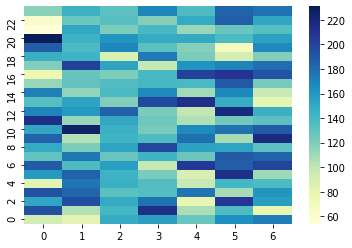

In [6]:
import seaborn as sns

#resample data to an hourly basis
hourly_consump = one_week.resample('1H', on='date').Energy_Consumption.sum()
hourly_consump.to_csv(r'/content/drive/MyDrive/Colab Notebooks/ME 592X/Assignment1/Update2.csv')

#get data from energy consumption column
new_hourly_consump = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ME 592X/Assignment1/Update2.csv')
y_axis_data = new_hourly_consump['Energy_Consumption']
y_axis_data_np = y_axis_data.to_numpy()

#arrange data into weeks
sun = np.array(y_axis_data_np[0:24])
mon = np.array(y_axis_data_np[24:48])
tue = np.array(y_axis_data_np[48:72])
wed = np.array(y_axis_data_np[72:96])
thurs = np.array(y_axis_data_np[96:120])
fri = np.array(y_axis_data_np[120:144])
sat = np.array(y_axis_data_np[144:168])

#generate a list for plotting
week = [sun, mon, tue, wed, thurs, fri, sat]
week_array = np.array(week)
week_array_tp = week_array.transpose()

#plot heatmap
ht_map = sns.heatmap(week_array_tp, cmap="YlGnBu")
ht_map.invert_yaxis()



**Task 3**

Text(0, 0.5, 'Number of 10 min intervals')

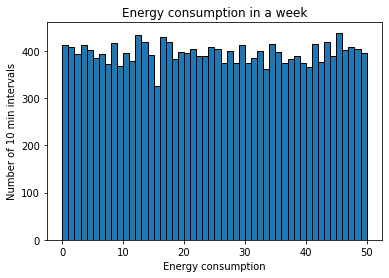

In [ ]:
### Histogram of energy consumption for a week ###
# a = np.unique(appl_energyCon_np)
plt.hist(appl_energyCon_np, edgecolor='black', bins=50)
plt.title('Energy consumption in a week')
plt.xlabel('Energy consumption')
plt.ylabel('Number of 10 min intervals')


**Task 4**

In [ ]:
import pandas as pd
from pandas import Series
from datetime import datetime
energy_data = pd.read_csv('/content/notebooks/ME592/energydata_complete.csv')

In [ ]:
def counter(time):
  time = pd.to_datetime(time).time()
  return time.hour * 3600 + time.minute * 60

In [ ]:
#create number of seconds from midnight feature variable
energy_data['NSM'] = energy_data.date.apply(counter)

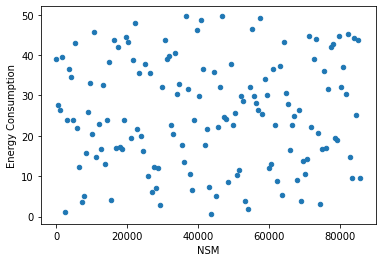

In [ ]:
#select a single fullday from the dataset for further evaluation
energy_data_day1 = energy_data.loc[42:185, :]
import matplotlib.pyplot as plt


# number of seconds from midnight vs. Energy consumption
energy_data_day1.plot.scatter(x='NSM', y='Energy Consumption')

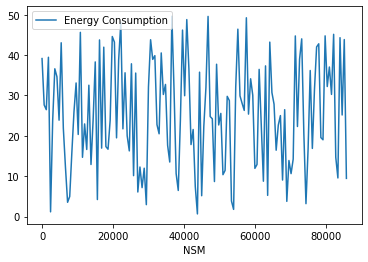

In [ ]:
## number of seconds from midnight vs. Energy consumption
energy_data_day1.plot(x='NSM', y='Energy Consumption')

**Task 5**

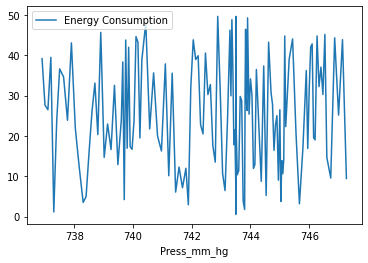

In [ ]:
#Press mm hg vs. Energy consumption
energy_data_day1.plot(x='Press_mm_hg', y='Energy Consumption')

**Task 6**

There seems to be a slight cyclical pattern occurring in energy consumption as the day progresses. This pattern does not extend to other days within the dataset. As a whole the dataset seems to show that energy consumption displays a relatively uniform distribution across time-of-day and press_mm_hg. 

2.3 Multi-variate

In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/mnt')
nb_path = '/content/notebooks'
os.symlink('/content/mnt/My Drive/Colab Notebooks', nb_path)
sys.path.insert(0, nb_path)

Mounted at /content/mnt


In [ ]:
import numpy as np
import scipy
from scipy import stats

In [ ]:
#load data
data = np.fromfile('/content/notebooks/ME592/airfoil_self_noise.dat')

**Tasks 1, 2, 3, 4, 5**

In [ ]:
#descriptive statistics
stats.describe(data)

DescribeResult(nobs=7498, minmax=(1.9892846249536843e-264, 4.8518329152210305e-33), mean=1.2268425893654288e-34, variance=4.4174614167250606e-67, skewness=5.388175166395633, kurtosis=27.722036927418166)

**Task 6**

In [ ]:
#median
print('Median = ', np.median(data))

Median =  1.7831175026052888e-72
